In [1]:
import pandas as pd
import seaborn as sns
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

archivo = 'C:/Users/genes/Downloads/Geo.xlsx'

df = pd.read_excel(archivo, sheet_name='Hoja1')
df.set_index('ID',inplace = True)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 1 to 2187
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Empresa o Dueno            2032 non-null   object 
 1   Faena                      2032 non-null   object 
 2   Deposito                   2032 non-null   object 
 3   Recurso                    2032 non-null   object 
 4   masa (t)                   1126 non-null   object 
 5   Estado                     2032 non-null   object 
 6   Origen                     2032 non-null   object 
 7   Region                     2032 non-null   object 
 8   Comuna                     2032 non-null   object 
 9   Coord. N                   2032 non-null   float64
 10  Coord. E                   2032 non-null   float64
 11  Cobre(g/t)                 2032 non-null   int64  
 12  Vanadio(g/t)               2032 non-null   int64  
 13  Cromo(g/t)                 2032 non-null   int64

In [3]:
df = df.drop(['masa (t)','Faena','Deposito','Coord. N','Coord. E','Empresa o Dueno','Recurso','Estado','Origen',
             'Region','Comuna','SUMA(%)'], axis=1)
df.head(5)

,Cobre(g/t),Vanadio(g/t),Cromo(g/t),Cobalto(g/t),Niquel(g/t),Zing(g/t),Rubidio(g/t),Estroncio(g/t),Itrio(g/t),Circonio(g/t),...,Gadolinio(g/t),Terbio(g/t),Disprosio(g/t),Holmio(g/t),Erbio(g/t),Tulio(g/t),Iterbio(g/t),Lutecio(g/t),Oro(g/t),Mercurio(g/t)
ID,,,,,,,,,,,,,,,,,,,,,
1,1772,71,21,35,7,90,62,144,10,92,...,3.88,0.54,2.81,0.71,1.79,0.24,1.75,0.23,0.02,0.01
2,2616,49,65,30,32,362,31,161,10,67,...,3.04,0.44,2.79,0.55,1.40,0.21,1.45,0.17,0.02,0.01
3,814,86,55,34,16,184,76,210,10,78,...,3.14,0.46,3.12,0.58,1.61,0.25,1.46,0.23,0.02,0.01
4,528,32,36,30,49,84,17,110,10,56,...,2.79,0.41,2.35,0.49,1.55,0.19,1.20,0.13,0.02,0.01
5,627,104,52,32,10,90,63,189,10,83,...,3.67,0.54,3.34,0.71,1.88,0.26,1.43,0.19,0.02,0.01


In [4]:
df.columns

Index(['Cobre(g/t)', 'Vanadio(g/t)', 'Cromo(g/t)', 'Cobalto(g/t)',
       'Niquel(g/t)', 'Zing(g/t)', 'Rubidio(g/t)', 'Estroncio(g/t)',
       'Itrio(g/t)', 'Circonio(g/t)', 'Niobio(g/t)', 'Bario(g/t)',
       'Plomo(g/t)', 'Escandio(g/t)', 'Cesio(g/t)', 'Hafnio(g/t)',
       'Tantalo(g/t)', 'Torio(g/t)', 'Uranio(g/t)', 'Arsénico(g/t)',
       'Molibdeno(g/t)', 'Antimonio(g/t)', 'Estaño(g/t)', 'Plata(g/t)',
       'Cadmio(g/t)', 'Bismuto(g/t)', 'Volframio(g/t)', 'Azúfre Total(%)',
       'Óxido_Silicio(%)', 'Óxido_Aluminio(%)', 'Dióxido_Titanio(%)',
       'Óxido_Hierro(%)', 'Óxido_Calcio(%)', 'Óxido_Magnesio(%)',
       'Óxido_Manganeso(%)', 'Óxido_Sodio(%)', 'Óxido_Potasio(%)',
       'Fósforo(%)', 'Clorocromato_Piridinio(%)', 'Óxido_Azúfre(%)',
       'Lantano(g/t)', 'Cerio(g/t)', 'Praseodimio(g/t)', 'Neodimio(g/t)',
       'Samario(g/t)', 'Europio(g/t)', 'Gadolinio(g/t)', 'Terbio(g/t)',
       'Disprosio(g/t)', 'Holmio(g/t)', 'Erbio(g/t)', 'Tulio(g/t)',
       'Iterbio(g/t)', 'Lute

In [5]:
df

,Cobre(g/t),Vanadio(g/t),Cromo(g/t),Cobalto(g/t),Niquel(g/t),Zing(g/t),Rubidio(g/t),Estroncio(g/t),Itrio(g/t),Circonio(g/t),...,Gadolinio(g/t),Terbio(g/t),Disprosio(g/t),Holmio(g/t),Erbio(g/t),Tulio(g/t),Iterbio(g/t),Lutecio(g/t),Oro(g/t),Mercurio(g/t)
ID,,,,,,,,,,,,,,,,,,,,,
1,1772,71,21,35,7,90,62,144,10,92,...,3.88,0.54,2.81,0.71,1.79,0.24,1.75,0.23,0.02,0.01
2,2616,49,65,30,32,362,31,161,10,67,...,3.04,0.44,2.79,0.55,1.40,0.21,1.45,0.17,0.02,0.01
3,814,86,55,34,16,184,76,210,10,78,...,3.14,0.46,3.12,0.58,1.61,0.25,1.46,0.23,0.02,0.01
4,528,32,36,30,49,84,17,110,10,56,...,2.79,0.41,2.35,0.49,1.55,0.19,1.20,0.13,0.02,0.01
5,627,104,52,32,10,90,63,189,10,83,...,3.67,0.54,3.34,0.71,1.88,0.26,1.43,0.19,0.02,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,181,57,56,28,12,67014,43,35,10,112,...,3.62,0.49,3.07,0.57,1.46,0.16,1.16,0.16,0.02,3.44
2184,986,89,60,13,5,709,18,27,10,127,...,2.12,0.30,1.45,0.30,0.59,0.10,0.71,0.08,0.02,2.43
2185,1792,32,44,23,5,379713,6,5,10,53,...,0.28,0.04,0.20,0.04,0.21,0.01,0.09,0.03,0.02,2.20


In [6]:
#df.to_excel('metales2.xlsx')

In [7]:
#archivo = 'C:/Users/genes/Downloads/metales 1.xlsx'

#df = pd.read_excel(archivo, sheet_name='Sheet1')

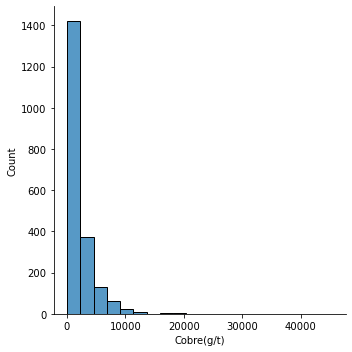

In [8]:
sns.displot(df['Cobre(g/t)'],bins=20);

[]

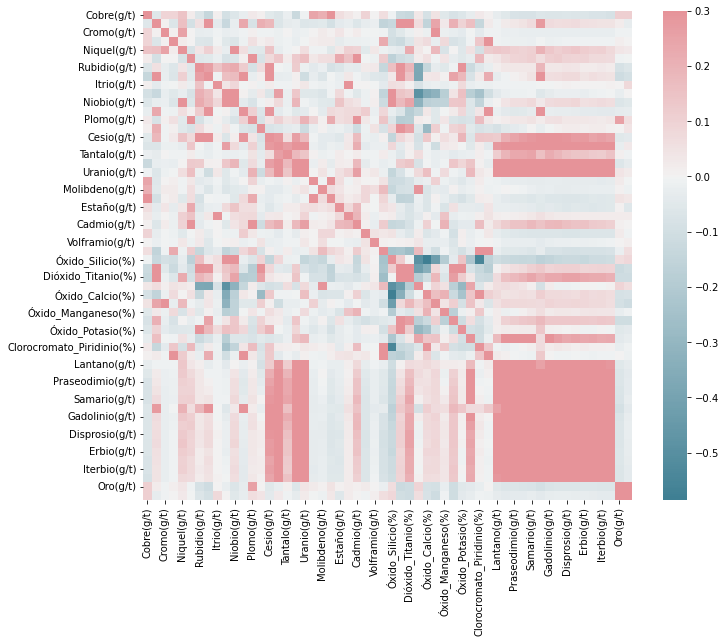

In [9]:
corr = df.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True)
plt.plot()

[]

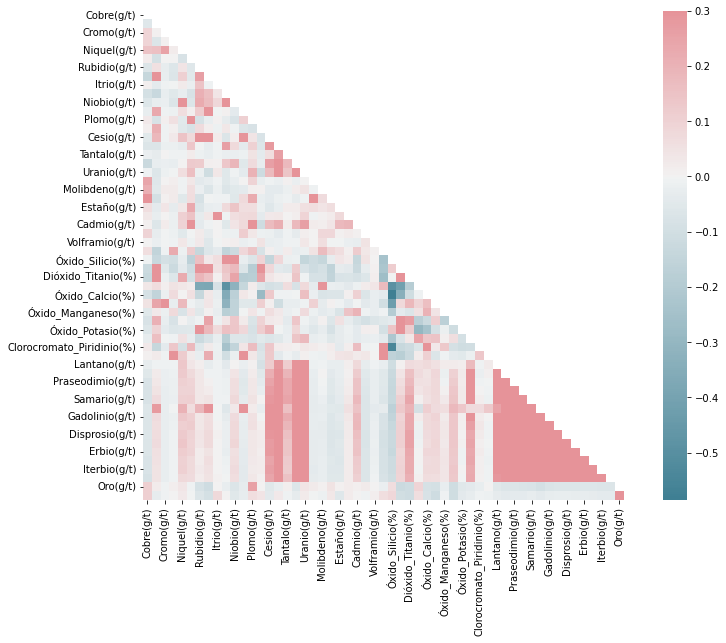

In [10]:
corr = df.corr()
f, ax = plt.subplots(figsize=(11, 9))

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True)
plt.plot()

In [16]:
dfsum=df.sum()
dfsum=dfsum.to_frame(name='Suma Total')
dfsum

,Suma Total
Cobre(g/t),4198317.000
Vanadio(g/t),287994.000
Cromo(g/t),315374.000
Cobalto(g/t),50681.000
Niquel(g/t),78945.000
Zing(g/t),2715771.000
Rubidio(g/t),136271.000
Estroncio(g/t),381347.000
Itrio(g/t),69091.000
Circonio(g/t),445295.000


In [17]:
fig = px.scatter(dfsum)
fig.show()

In [18]:
dfmean=df.mean()
dfmean=dfmean.to_frame(name='Mean Total')
dfmean

,Mean Total
Cobre(g/t),2066.100886
Vanadio(g/t),141.729331
Cromo(g/t),155.203740
Cobalto(g/t),24.941437
Niquel(g/t),38.850886
Zing(g/t),1336.501476
Rubidio(g/t),67.062500
Estroncio(g/t),187.670768
Itrio(g/t),34.001476
Circonio(g/t),219.141240


In [19]:
fig = px.scatter(dfmean)
fig.show()